In [285]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

In [286]:
path1 = './resources/국민관심질병_성별연령별10세구간별현황_202201_202212.xlsx'

df_brain = pd.read_excel(path1,sheet_name='뇌혈관질환')
df_diabities = pd.read_excel(path1,sheet_name='당뇨병')
df_heart = pd.read_excel(path1,sheet_name='심혈관질환')
df_liver = pd.read_excel(path1,sheet_name='간의질환')
df_cancer = pd.read_excel(path1,sheet_name='암')

df_patient = pd.concat([df_brain,df_heart,df_liver,df_diabities,df_cancer])
df_patient.columns = ['category','sex','age','date','cost','insurance']
df_patient['month'] = df_patient['date'].str.replace('년 ','-').str.replace('월','')
df_patient['month'] = pd.to_datetime(df_patient.month)
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1080 entries, 0 to 215
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   category   1080 non-null   object        
 1   sex        1080 non-null   object        
 2   age        1080 non-null   object        
 3   date       1080 non-null   object        
 4   cost       1080 non-null   int64         
 5   insurance  1080 non-null   int64         
 6   month      1080 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 67.5+ KB


In [287]:
df_patient_sum = df_patient[['category','age','cost','insurance']]
df_patient_sum = df_patient_sum.groupby(['category','age'])[['cost','insurance']].sum()
df_patient_sum

cost   insurance
category age                           
간의질환     0_9세       2479296     1985287
         10_19세     7047370     4519854
         20_29세    23058683    15150344
         30_39세    59937245    39068844
         40_49세   128740021    84985578
         50_59세   188680377   124903493
         60_69세   192922345   128627723
         70_79세    92069240    62702854
         80세이상     41013809    29625079
뇌혈관질환    0_9세       5617632     5019857
         10_19세     7078467     6022895
         20_29세    18492415    14906009
         30_39세    58489168    46924396
         40_49세   188813793   151313826
         50_59세   423218502   333327515
         60_69세   708870592   549886706
         70_79세   791061096   614477703
         80세이상    815605300   639286920
당뇨병      0_9세       1304170     1012546
         10_19세     6971339     4581342
         20_29세    14321102     9209564
         30_39세    37525214    24569407
         40_49세   105198091    69317550
         50_59세   221468334   146655781
         60_69세   316844928   216271190
         70_79세   248830235   176944076
         80세이상    150099219   109501169
심혈관질환    0_9세       6399522     5907696
         10_19세     3257762     2764438
         20_29세     7147338     5699868
         30_39세    24422783    20058437
         40_49세    94548732    79138557
         50_59세   258425074   216304082
         60_69세   460593796   382018607
         70_79세   426851756   350369553
         80세이상    318327152   256216753
암        0_9세       2853169     2536207
         10_19세     6270444     5467698
         20_29세    67414148    59073927
         30_39세   303844637   265653201
         40_49세  1022741246   899336261
         50_59세  1932402779  1717265436
         60_69세  2748980407  2463936443
         70_79세  2074480024  1872171831
         80세이상   1028832272   926083507

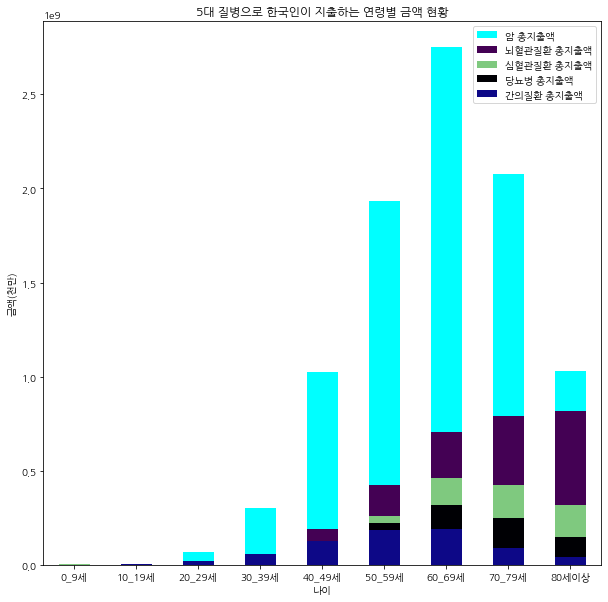

In [288]:
# 1. 5대 질병으로 한국인이 지출하는 연령별 금액 현황
cost_graph = pd.DataFrame(df_patient_sum['cost'])

heart_graph = cost_graph.loc[('심혈관질환')]
heart_graph.columns = ['심혈관질환 총지출액']
brain_graph = cost_graph.loc[('뇌혈관질환')]
brain_graph.columns = ['뇌혈관질환 총지출액']
liver_graph = cost_graph.loc[('간의질환')]
liver_graph.columns = ['간의질환 총지출액']
dia_graph = cost_graph.loc[('당뇨병')]
dia_graph.columns = ['당뇨병 총지출액']
cancer_graph = cost_graph.loc[('암')]
cancer_graph.columns = ['암 총지출액']

cancer_graph = cancer_graph.plot(kind='bar',colormap='cool',figsize=(10,10))
brain_graph = brain_graph.plot(ax=cancer_graph,kind='bar',colormap='viridis')
heart_graph = heart_graph.plot(ax=cancer_graph,kind='bar',colormap='Accent')
dia_graph = dia_graph.plot(ax=cancer_graph,kind='bar',colormap='magma')
liver_graph = liver_graph.plot(ax=cancer_graph,kind='bar',colormap='plasma',rot=0)

plt.title('5대 질병으로 한국인이 지출하는 연령별 금액 현황')
plt.ylabel('금액(천만)')
plt.xlabel('나이')
plt.show()

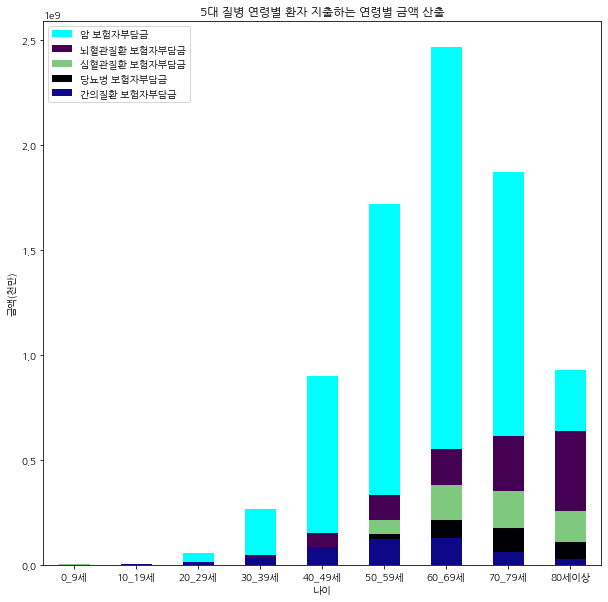

In [309]:
# 3. 5대 질병 연령별 환자 지출하는 연령별 금액 산출
insurance_graph = pd.DataFrame(df_patient_sum['insurance'])

heart_graph = insurance_graph.loc[('심혈관질환')]
heart_graph.columns = ['심혈관질환 보험자부담금']
brain_graph = insurance_graph.loc[('뇌혈관질환')]
brain_graph.columns = ['뇌혈관질환 보험자부담금']
liver_graph = insurance_graph.loc[('간의질환')]
liver_graph.columns = ['간의질환 보험자부담금']
dia_graph = insurance_graph.loc[('당뇨병')]
dia_graph.columns = ['당뇨병 보험자부담금']
cancer_graph = insurance_graph.loc[('암')]
cancer_graph.columns = ['암 보험자부담금']

cancer_graph = cancer_graph.plot(kind='bar',colormap='cool',figsize=(10,10))
brain_graph = brain_graph.plot(ax=cancer_graph,kind='bar',colormap='viridis')
heart_graph = heart_graph.plot(ax=cancer_graph,kind='bar',colormap='Accent')
dia_graph = dia_graph.plot(ax=cancer_graph,kind='bar',colormap='magma')
liver_graph = liver_graph.plot(ax=cancer_graph,kind='bar',colormap='plasma',rot=0)

plt.title('5대 질병 연령별 환자 지출하는 연령별 금액 산출')
plt.ylabel('금액(천만)')
plt.xlabel('나이')
plt.show()

In [290]:
path2 = './resources/국민관심질병_요양기관소재지별현황_202201_202212.xlsx'

df_hospital_liver = pd.read_excel(path2,sheet_name='간의질환')
df_hospital_heart = pd.read_excel(path2,sheet_name='심혈관질환')
df_hospital_cancer = pd.read_excel(path2,sheet_name='암')
df_hospital_diabities = pd.read_excel(path2,sheet_name='당뇨병')
df_hospital_brain = pd.read_excel(path2,sheet_name='뇌혈관질환')

In [291]:
df_hospital = pd.concat([df_hospital_liver,df_hospital_heart,df_hospital_diabities,df_hospital_brain,df_hospital_cancer])
df_hospital.columns = ['category','region','num_patient','date']
df_hospital['month'] = df_hospital['date'].str.replace('년 ','-').str.replace('월','')
df_hospital['month'] = pd.to_datetime(df_hospital.month)
df_hospital

,category,region,num_patient,date,month
0,간의질환,서울,75293,2022년 01월,2022-01-01
1,간의질환,부산,26889,2022년 01월,2022-01-01
2,간의질환,인천,17643,2022년 01월,2022-01-01
3,간의질환,대구,19706,2022년 01월,2022-01-01
4,간의질환,광주,10373,2022년 01월,2022-01-01
...,...,...,...,...,...
199,암,전남,27112,2022년 12월,2022-12-01
200,암,경북,12153,2022년 12월,2022-12-01
201,암,경남,31763,2022년 12월,2022-12-01
202,암,제주,5487,2022년 12월,2022-12-01


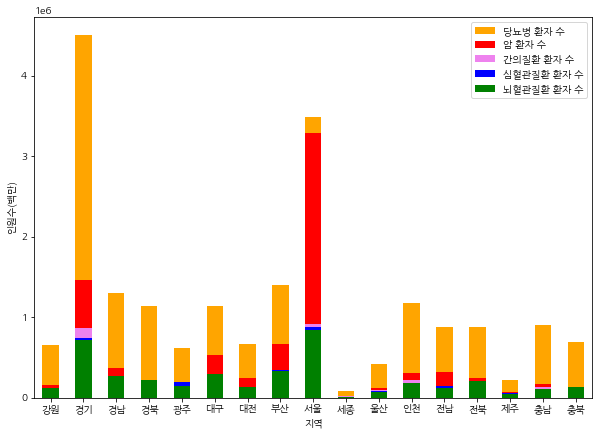

In [292]:
# 2. 5대 질병 지역별 환자 현황
region_graph = df_hospital.groupby(['category','region'])['num_patient'].sum()
region_graph = pd.DataFrame(region_graph)

heart_graph = region_graph.loc[('심혈관질환')]
heart_graph.columns = ['심혈관질환 환자 수']
brain_graph = region_graph.loc[('뇌혈관질환')]
brain_graph.columns = ['뇌혈관질환 환자 수']
liver_graph = region_graph.loc[('간의질환')]
liver_graph.columns = ['간의질환 환자 수']
dia_graph = region_graph.loc[('당뇨병')]
dia_graph.columns = ['당뇨병 환자 수']
cancer_graph = region_graph.loc[('암')]
cancer_graph.columns = ['암 환자 수']

dia_graph_g = dia_graph.plot(kind='bar',color='orange',figsize=(10,7))
cancer_graph_g = cancer_graph.plot(ax=dia_graph_g,kind='bar',color='r')
liver_graph_g = liver_graph.plot(ax=dia_graph_g,kind='bar',color='violet')
heart_graph_g = heart_graph.plot(ax=dia_graph_g,kind='bar',color='b')
brain_graph_g = brain_graph.plot(ax=dia_graph_g,kind='bar',color='g',rot=0)

plt.title('5대 질병 지역별 환자 현황')
plt.ylabel('인원수(백만)')
plt.xlabel('지역')
plt.show()

In [293]:
heart_graph.columns = ['num_patient']
brain_graph.columns = ['num_patient']
liver_graph.columns = ['num_patient']
dia_graph.columns = ['num_patient']
cancer_graph.columns = ['num_patient']
heart_graph

,num_patient
region,
강원,114274
경기,743777
경남,236034
경북,204782
광주,189260
대구,251930
대전,120500
부산,337035
서울,871068


In [295]:
# 4. 5대 질병 환자 수 데이터 지도 시각화
import folium
import json

geo_path = './resources/Si_Do_map_utf8.json'

geo_data = json.load(open(geo_path, encoding='euc-kr'))

heart_map = folium.Map(location=[37.5502,126.982],zoom_start=9)

# 심혈관질환
folium.Choropleth(geo_data=geo_data,
                  data=heart_graph['num_patient'],
                  columns=[heart_graph.index,heart_graph['num_patient']],
                  fill_color='YlOrRd',fill_opacity=0.7,line_opacity=0.3,
                  threshhold_scale=[10000,50000,100000,250000,500000,1000000,2000000,3000000,4000000],
                  key_on='feature.properties.CTP_KOR_NM'
                  ).add_to(heart_map)

heart_map.show_in_browser()

Your map should have been opened in your browser automatically.
Press ctrl+c to return.


In [299]:
# 뇌혈관질환
brain_map = folium.Map(location=[37.5502,126.982],zoom_start=9)

folium.Choropleth(geo_data=geo_data,
                  data=brain_graph['num_patient'],
                  columns=[brain_graph.index,brain_graph['num_patient']],
                  fill_color='Greens',fill_opacity=0.7,line_opacity=0.3,
                  threshhold_scale=[10000,50000,100000,250000,500000,1000000,2000000,3000000,4000000],
                  key_on='feature.properties.CTP_KOR_NM'
                  ).add_to(brain_map)

brain_map.show_in_browser()

Your map should have been opened in your browser automatically.
Press ctrl+c to return.


In [300]:
# 간의질환
liver_map = folium.Map(location=[37.5502,126.982],zoom_start=9)

folium.Choropleth(geo_data=geo_data,
                  data=liver_graph['num_patient'],
                  columns=[liver_graph.index,liver_graph['num_patient']],
                  fill_color='Blues',fill_opacity=0.7,line_opacity=0.3,
                  threshhold_scale=[10000,50000,100000,250000,500000,1000000,2000000,3000000,4000000],
                  key_on='feature.properties.CTP_KOR_NM'
                  ).add_to(liver_map)

liver_map.show_in_browser()

Your map should have been opened in your browser automatically.
Press ctrl+c to return.


In [301]:
# 당뇨병
diabetes_map = folium.Map(location=[37.5502,126.982],zoom_start=9)

folium.Choropleth(geo_data=geo_data,
                  data=dia_graph['num_patient'],
                  columns=[dia_graph.index,dia_graph['num_patient']],
                  fill_color='RdPu',fill_opacity=0.7,line_opacity=0.3,
                  threshhold_scale=[10000,50000,100000,250000,500000,1000000,2000000,3000000,4000000],
                  key_on='feature.properties.CTP_KOR_NM'
                  ).add_to(diabetes_map)

diabetes_map.show_in_browser()

Your map should have been opened in your browser automatically.
Press ctrl+c to return.


In [307]:
# 암
cancer_map = folium.Map(location=[37.5502,126.982],zoom_start=9)

folium.Choropleth(geo_data=geo_data,
                  data=cancer_graph['num_patient'],
                  columns=[cancer_graph.index,cancer_graph['num_patient']],
                  fill_color='Reds',fill_opacity=0.7,line_opacity=0.3,
                  threshhold_scale=[10000,50000,100000,250000,500000,1000000,2000000,3000000,4000000],
                  key_on='feature.properties.CTP_KOR_NM'
                  ).add_to(cancer_map)

cancer_map.show_in_browser()

Your map should have been opened in your browser automatically.
Press ctrl+c to return.


In [306]:
# 5. 5대 질병 지역별 환자 수 / 지역별 병원 수 시각화
hospitals = pd.read_excel('./resources/병원수light.xlsx')
hospitals.columns = ['region','num_hospital']
hospitals.set_index('region',inplace=True)
hospitals

,num_hospital
region,
서울,18628
부산,5484
인천,3681
대구,3988
광주,2284
대전,2331
울산,1415
경기,16948
강원,1941


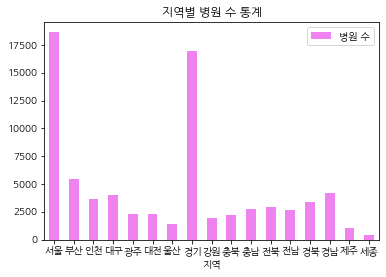

In [312]:
# 병원 수 그래프
hospitals.plot(kind='bar',color='violet',y='num_hospital',rot=0,label='병원 수')

plt.title('지역별 병원 수 통계')
plt.xlabel('지역')
plt.show()

In [305]:
# 병원 지도로 시각화
hospital_map = folium.Map(location=[37.5502,126.982],zoom_start=9)

folium.Choropleth(geo_data=geo_data,
                  data=hospitals['num_hospital'],
                  columns=[hospitals.index,hospitals['num_hospital']],
                  fill_color='YlGn',fill_opacity=0.7,line_opacity=0.3,
                  key_on='feature.properties.CTP_KOR_NM'
                  ).add_to(hospital_map)

hospital_map.show_in_browser()

Your map should have been opened in your browser automatically.
Press ctrl+c to return.
